In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
from sklearn.model_selection import train_test_split


In [10]:
start_date = '2010-01-01'
end_date = '2019-12-31'

# df = data.DataReader('005930', 'naver',start = start_date,end = end_date)
df = data.get_data_tiingo("AAPL", api_key=('cd8d4b275af91ab35f9bdd2ea6023790a946718a'),start = start_date,end = end_date)
df.head()
df.tail()

C:\Users\Kshitij\AppData\Local\Temp\ipykernel_12100\562198263.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = data.get_data_tiingo("AAPL", api_key=('cd8d4b275af91ab35f9bdd2ea6023790a946718a'),start = start_date,end = end_date)


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-12-24 00:00:00+00:00  284.27  284.89  282.92  284.69  12119714   
       2019-12-26 00:00:00+00:00  289.91  289.98  284.70  284.82  23334004   
       2019-12-27 00:00:00+00:00  289.80  293.97  288.12  291.12  36592936   
       2019-12-30 00:00:00+00:00  291.52  292.69  285.22  289.46  36059614   
       2019-12-31 00:00:00+00:00  293.65  293.68  289.52  289.93  25247625   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2019-12-24 00:00:00+00:00  69.419992  69.571399  69.090316  69.522558   
       2019-12-26 00:00:00+00:00  70.797305  70.814399  69.525000  69.554304   
       2019-12-27 00:00:00+00:00  70.770442  71.788775  70.360179  71.092792   
       2019-12-30 00:00:00+00:00  71.190474  71.476193  69.651986  70.687413   
       2019-12-31 00:00:00+00:00  71.710630  71.717956  70.702065  70.802189   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-12-24 00:00:00+00:00   48478856      0.0          1.0  
       2019-12-26 00:00:00+00:00   93336016      0.0          1.0  
       2019-12-27 00:00:00+00:00  146371744      0.0          1.0  
       2019-12-30 00:00:00+00:00  144238456      0.0          1.0  
       2019-12-31 00:00:00+00:00  100990500      0.0          1.0

In [11]:
df = df.reset_index()
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2010-01-04 00:00:00+00:00,214.01,214.50,212.38,213.43,17633200,6.495476,6.510348,6.446004,6.477873,493730093,0.0,1.0
1,AAPL,2010-01-05 00:00:00+00:00,214.38,215.59,213.25,214.60,21496600,6.506706,6.543431,6.472409,6.513384,601905401,0.0,1.0
2,AAPL,2010-01-06 00:00:00+00:00,210.97,215.23,210.75,214.38,19720000,6.403208,6.532505,6.396531,6.506706,552160552,0.0,1.0
3,AAPL,2010-01-07 00:00:00+00:00,210.58,212.00,209.05,211.75,17040400,6.391371,6.434470,6.344934,6.426882,477131677,0.0,1.0
4,AAPL,2010-01-08 00:00:00+00:00,211.98,212.00,209.06,210.30,15986100,6.433863,6.434470,6.345237,6.382873,447611247,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,AAPL,2019-12-24 00:00:00+00:00,284.27,284.89,282.92,284.69,12119714,69.419992,69.571399,69.090316,69.522558,48478856,0.0,1.0
2512,AAPL,2019-12-26 00:00:00+00:00,289.91,289.98,284.70,284.82,23334004,70.797305,70.814399,69.525000,69.554304,93336016,0.0,1.0
2513,AAPL,2019-12-27 00:00:00+00:00,289.80,293.97,288.12,291.12,36592936,70.770442,71.788775,70.360179,71.092792,146371744,0.0,1.0
2514,AAPL,2019-12-30 00:00:00+00:00,291.52,292.69,285.22,289.46,36059614,71.190474,71.476193,69.651986,70.687413,144238456,0.0,1.0


In [12]:
df = df.drop(['date','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis = 1)
df

,symbol,close,high,low,open,volume
0,AAPL,214.01,214.50,212.38,213.43,17633200
1,AAPL,214.38,215.59,213.25,214.60,21496600
2,AAPL,210.97,215.23,210.75,214.38,19720000
3,AAPL,210.58,212.00,209.05,211.75,17040400
4,AAPL,211.98,212.00,209.06,210.30,15986100
...,...,...,...,...,...,...
2511,AAPL,284.27,284.89,282.92,284.69,12119714
2512,AAPL,289.91,289.98,284.70,284.82,23334004
2513,AAPL,289.80,293.97,288.12,291.12,36592936
2514,AAPL,291.52,292.69,285.22,289.46,36059614


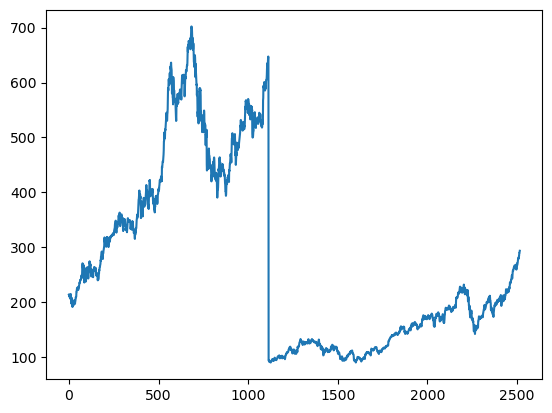

In [13]:
plt.plot(df.close)


In [14]:
ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2511    237.6068
2512    238.5725
2513    239.5005
2514    240.4253
2515    241.3275
Name: close, Length: 2516, dtype: float64

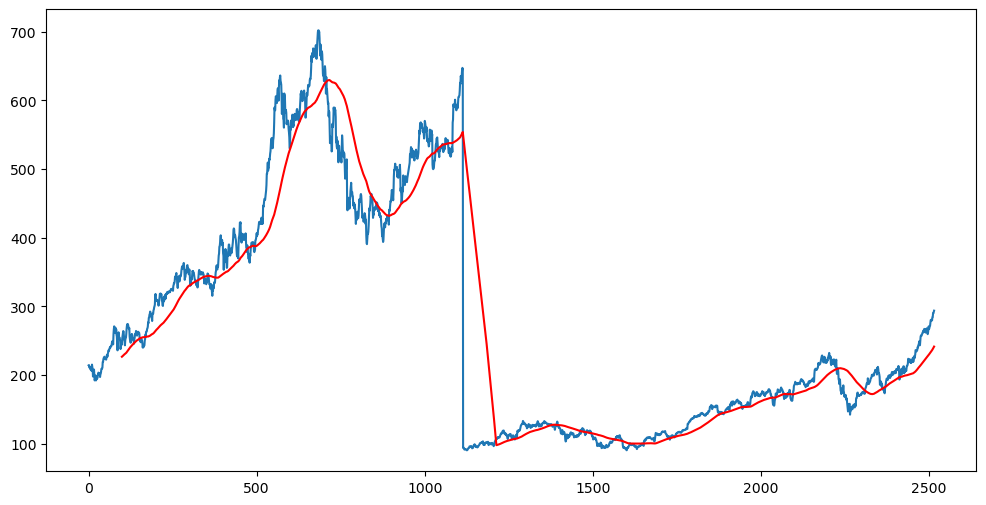

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')

In [16]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    217.04605
2512    217.58705
2513    218.11740
2514    218.64440
2515    219.17255
Name: close, Length: 2516, dtype: float64

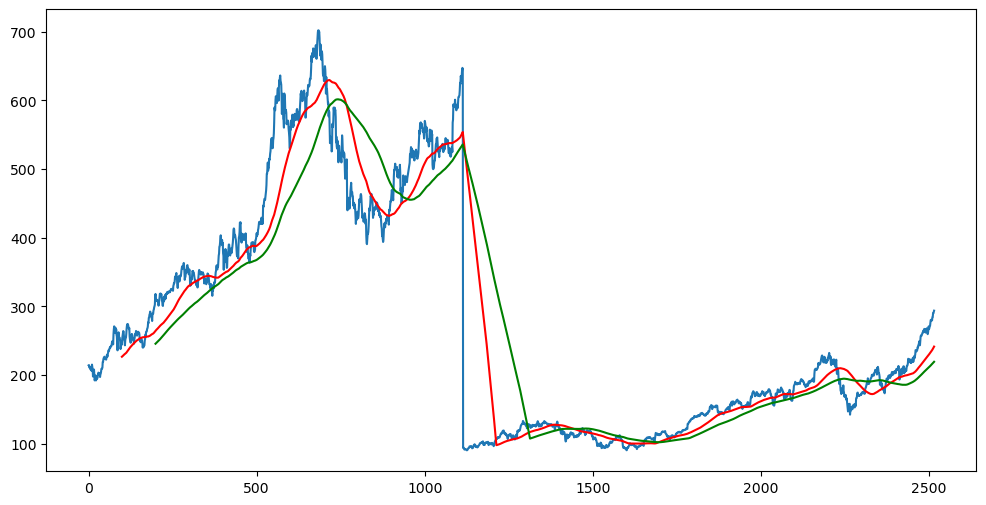

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [18]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])

data_training.shape


(1761, 1)

In [19]:
data_testing.shape

(755, 1)

In [20]:
data_training.head()

,close
0,214.01
1,214.38
2,210.97
3,210.58
4,211.98


In [21]:
data_testing.head()

,close
1761,115.82
1762,116.15
1763,116.02
1764,116.61
1765,117.91


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.20223268],
       [0.20283744],
       [0.1972639 ],
       ...,
       [0.04409794],
       [0.0432807 ],
       [0.04323167]])

In [24]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1661, 100, 1)

In [25]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 [==============================] - 33s 377ms/step - loss: 0.0556
Epoch 2/50
52/52 [==============================] - 19s 370ms/step - loss: 0.0143
Epoch 3/50
52/52 [==============================] - 19s 363ms/step - loss: 0.0139
Epoch 4/50
52/52 [==============================] - 18s 342ms/step - loss: 0.0109
Epoch 5/50
52/52 [==============================] - 18s 340ms/step - loss: 0.0086
Epoch 6/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0091
Epoch 7/50
52/52 [==============================] - 18s 344ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 18s 346ms/step - loss: 0.0071
Epoch 11/50
52/52 [==============================] - 18s 341ms/step - loss: 0.0067
Epoch 12/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0063
Epoch 13/50
5

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head

<bound method NDFrame.head of        close
1761  115.82
1762  116.15
1763  116.02
1764  116.61
1765  117.91
...      ...
2511  284.27
2512  289.91
2513  289.80
2514  291.52
2515  293.65

[755 rows x 1 columns]>

In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing,ignore_index = True)

C:\Users\Kshitij\AppData\Local\Temp\ipykernel_12100\1195911748.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index = True)


In [33]:
final_df.head

<bound method NDFrame.head of       close
0    108.81
1    108.00
2    107.93
3    108.18
4    109.48
..      ...
850  284.27
851  289.91
852  289.80
853  291.52
854  293.65

[855 rows x 1 columns]>

In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02981314],
       [0.02556162],
       [0.02519421],
       [0.0265064 ],
       [0.03332983],
       [0.03280495],
       [0.03196515],
       [0.03123032],
       [0.03269998],
       [0.02823851],
       [0.03002309],
       [0.02571908],
       [0.02330464],
       [0.0199979 ],
       [0.01936805],
       [0.01506404],
       [0.01558891],
       [0.01889565],
       [0.02414445],
       [0.02398698],
       [0.02745119],
       [0.01254461],
       [0.        ],
       [0.01212471],
       [0.02529918],
       [0.04534957],
       [0.06529498],
       [0.06188327],
       [0.05484988],
       [0.0547974 ],
       [0.05469242],
       [0.06030863],
       [0.05028343],
       [0.05117573],
       [0.05227798],
       [0.05679194],
       [0.04750157],
       [0.05206802],
       [0.04928616],
       [0.05180558],
       [0.05206802],
       [0.05647701],
       [0.05736931],
       [0.0678144 ],
       [0.0691266 ],
       [0.07458535],
       [0.07269578],
       [0.076

In [35]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [36]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [37]:
x_test

array([[[0.02981314],
        [0.02556162],
        [0.02519421],
        ...,
        [0.07416544],
        [0.07154105],
        [0.07138358]],

       [[0.02556162],
        [0.02519421],
        [0.0265064 ],
        ...,
        [0.07154105],
        [0.07138358],
        [0.06660718]],

       [[0.02519421],
        [0.0265064 ],
        [0.03332983],
        ...,
        [0.07138358],
        [0.06660718],
        [0.06833928]],

       ...,

       [[0.49270418],
        [0.50341172],
        [0.52645392],
        ...,
        [0.94934915],
        [0.95076632],
        [0.98036952]],

       [[0.50341172],
        [0.52645392],
        [0.51364686],
        ...,
        [0.95076632],
        [0.98036952],
        [0.97979215]],

       [[0.52645392],
        [0.51364686],
        [0.51096998],
        ...,
        [0.98036952],
        [0.97979215],
        [0.98882007]]])

In [38]:
# Making Predictions
y_predicted = model.predict(x_test)

24/24 [==============================] - 5s 70ms/step


In [39]:
y_predicted.shape

(755, 1)

In [40]:
y_test

array([0.06660718, 0.06833928, 0.06765694, 0.07075373, 0.07757716,
       0.08324585, 0.08387571, 0.08723494, 0.08461054, 0.08350829,
       0.08854713, 0.08849465, 0.0873924 , 0.08854713, 0.08896704,
       0.08838967, 0.09841486, 0.09872979, 0.09878228, 0.09710267,
       0.095633  , 0.13447407, 0.13331934, 0.13620617, 0.14255721,
       0.14906571, 0.1517426 , 0.15373714, 0.1521625 , 0.15830359,
       0.167384  , 0.16995591, 0.16908986, 0.17105816, 0.17620197,
       0.17835398, 0.17530968, 0.17599202, 0.1774092 , 0.17772412,
       0.19242074, 0.18806425, 0.19236826, 0.19005879, 0.19100357,
       0.1882742 , 0.18659458, 0.18900903, 0.18932396, 0.18822171,
       0.19593743, 0.19714466, 0.1934705 , 0.20118623, 0.19268318,
       0.20097628, 0.19835188, 0.19688222, 0.19814193, 0.2134684 ,
       0.21514802, 0.21415075, 0.21273357, 0.21294352, 0.21855973,
       0.21462314, 0.21273357, 0.21105396, 0.21016166, 0.20207852,
       0.20297082, 0.19903422, 0.20312828, 0.19982154, 0.19709

In [41]:
y_predicted

array([[0.08375406],
       [0.08461176],
       [0.08530334],
       [0.0858407 ],
       [0.08628079],
       [0.0867416 ],
       [0.08733109],
       [0.08807868],
       [0.08897045],
       [0.08993189],
       [0.09087333],
       [0.09176376],
       [0.09258756],
       [0.09332678],
       [0.09398058],
       [0.09455694],
       [0.09505954],
       [0.09556445],
       [0.0961183 ],
       [0.09672412],
       [0.09734423],
       [0.09792489],
       [0.09869966],
       [0.09979874],
       [0.10123622],
       [0.10297588],
       [0.10496737],
       [0.10713796],
       [0.10940385],
       [0.11167693],
       [0.11394805],
       [0.11627331],
       [0.11870489],
       [0.12124342],
       [0.12386884],
       [0.12658283],
       [0.1293857 ],
       [0.1322276 ],
       [0.13505247],
       [0.1378225 ],
       [0.14051221],
       [0.14323977],
       [0.1460561 ],
       [0.14899468],
       [0.1520242 ],
       [0.1550946 ],
       [0.15812469],
       [0.161

In [42]:
scaler.scale_

array([0.00524879])

In [43]:
scale_factor = 1/0.00524879
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

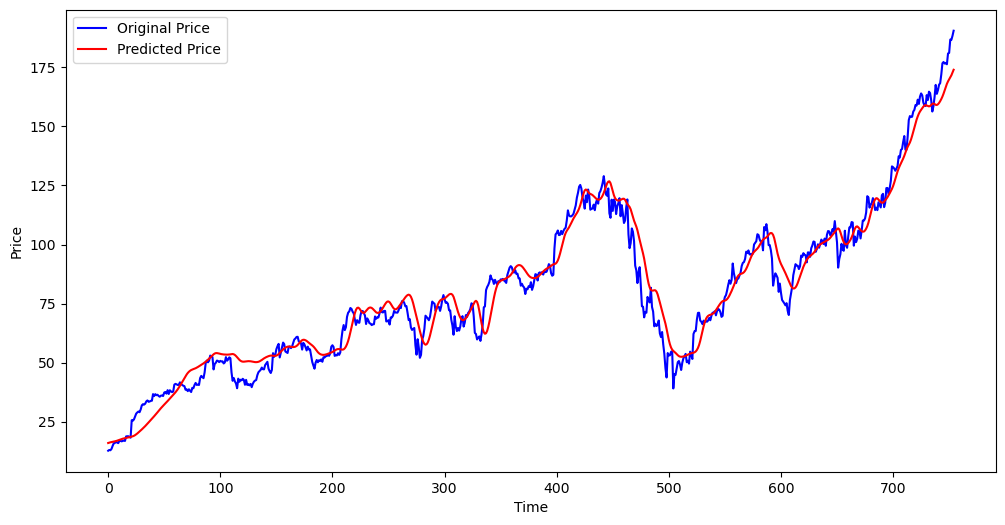

In [44]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = "Original Price")
plt.plot(y_predicted,'r',label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()